# Drug Analysis Using NLP and NN

In [346]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [347]:
df=pd.read_csv('train.csv')
df.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [348]:
df.isna().sum()

patient_id                    0
name_of_drug                  0
use_case_for_drug             0
review_by_patient             0
effectiveness_rating          0
drug_approved_by_UIC          0
number_of_times_prescribed    0
base_score                    0
dtype: int64

In [349]:
df.shape

(32165, 8)

In [350]:
##checking for empty spaces in the review
list_empty=[]
for index,name,review in df[['name_of_drug','review_by_patient']].itertuples():
    if type(review)==str:
        if review.isspace():
            list_empty.append(index)
print(list_empty)

[]


In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 8 columns):
patient_id                    32165 non-null int64
name_of_drug                  32165 non-null object
use_case_for_drug             32165 non-null object
review_by_patient             32165 non-null object
effectiveness_rating          32165 non-null int64
drug_approved_by_UIC          32165 non-null object
number_of_times_prescribed    32165 non-null int64
base_score                    32165 non-null float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.0+ MB


In [352]:
df.describe()

,patient_id,effectiveness_rating,number_of_times_prescribed,base_score
count,32165.000000,32165.000000,32165.000000,32165.000000
mean,115487.511052,6.998912,27.893207,6.664261
std,67146.156602,3.274781,35.819035,1.588699
min,9.000000,1.000000,0.000000,0.899076
25%,56922.000000,5.000000,6.000000,6.109307
50%,115776.000000,8.000000,16.000000,6.788245
75%,173562.000000,10.000000,36.000000,7.900790
max,232289.000000,10.000000,771.000000,8.992453


In [353]:
len(df.name_of_drug.unique())


2220

In [354]:
len(df.use_case_for_drug.unique())

636

In [355]:
df['drug_approved_by_UIC']=pd.to_datetime(df['drug_approved_by_UIC'])
df['name_of_drug']=df['name_of_drug'].astype('category')
df['use_case_for_drug']=df['use_case_for_drug'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 8 columns):
patient_id                    32165 non-null int64
name_of_drug                  32165 non-null category
use_case_for_drug             32165 non-null category
review_by_patient             32165 non-null object
effectiveness_rating          32165 non-null int64
drug_approved_by_UIC          32165 non-null datetime64[ns]
number_of_times_prescribed    32165 non-null int64
base_score                    32165 non-null float64
dtypes: category(2), datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.7+ MB


In [356]:
df.drug_approved_by_UIC.dt.year.max()

2017

In [357]:
df['years_usage']=2020-df.drug_approved_by_UIC.dt.year
df.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,years_usage
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,8.022969,8
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,7.858458,10
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,6.341969,11
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,6.590176,4
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,2015-11-28,43,6.144782,5


D:\ProgramFiles\anaconda3\envs\nlp_course\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Years vs Score')

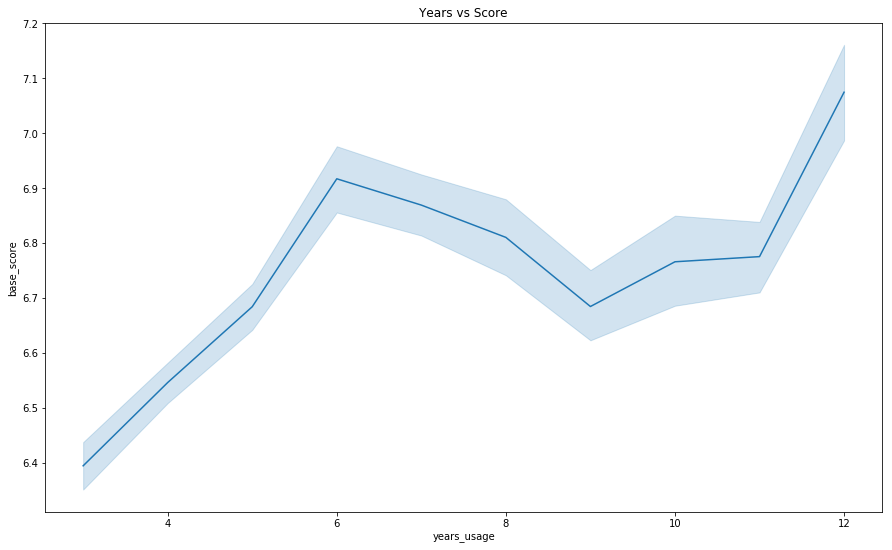

In [358]:
ax=sns.lineplot(x='years_usage',y='base_score',data=df)
plt.title('Years vs Score')

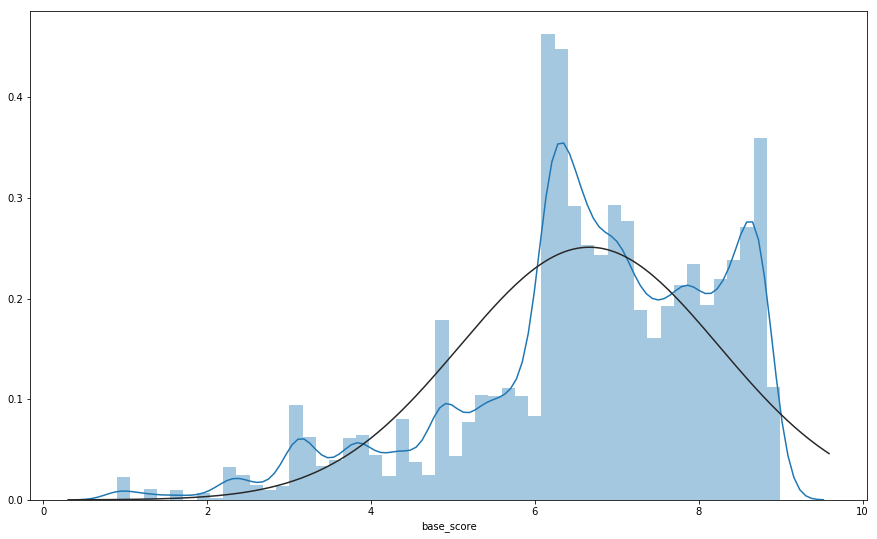

In [359]:

from scipy.stats import norm
sns.distplot(df.base_score,fit=norm,kde=True)

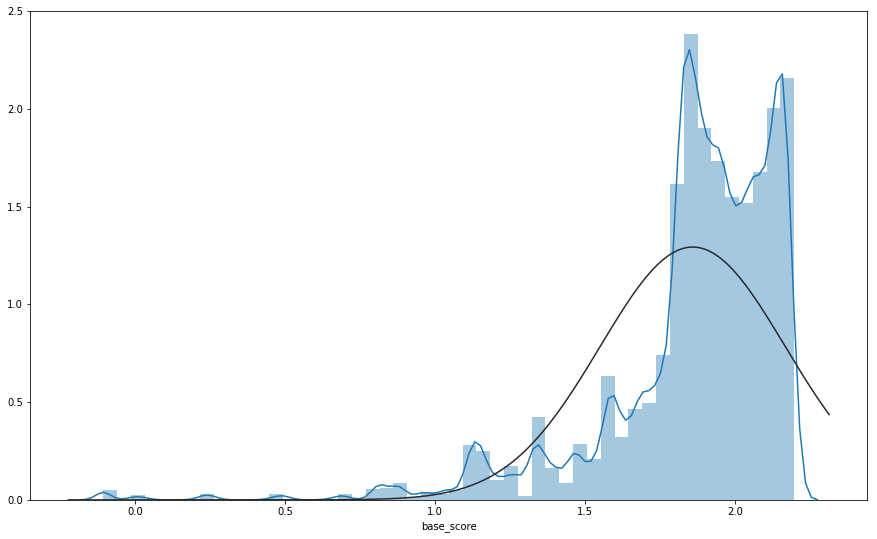

In [360]:
sns.distplot((np.log(df.base_score)),fit=norm)

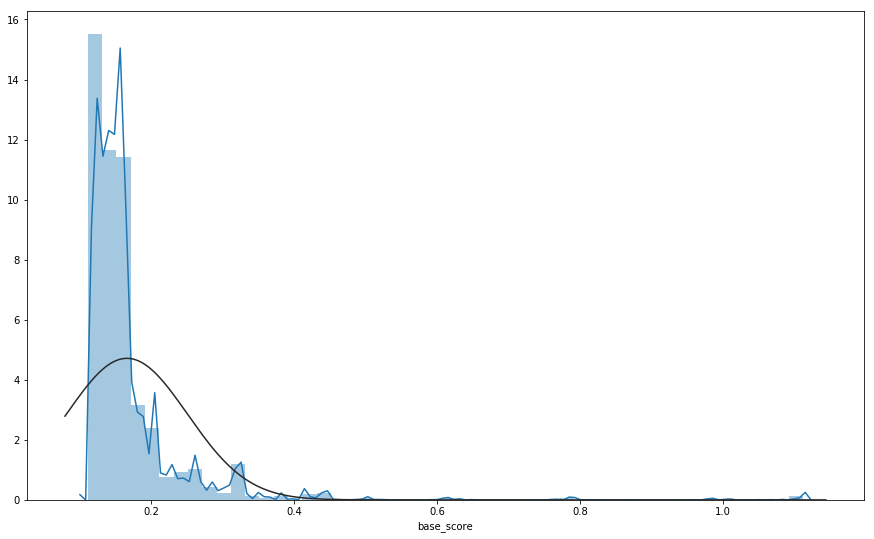

In [361]:

sns.distplot(df['base_score'].map(lambda x :1/(x)),fit=norm)

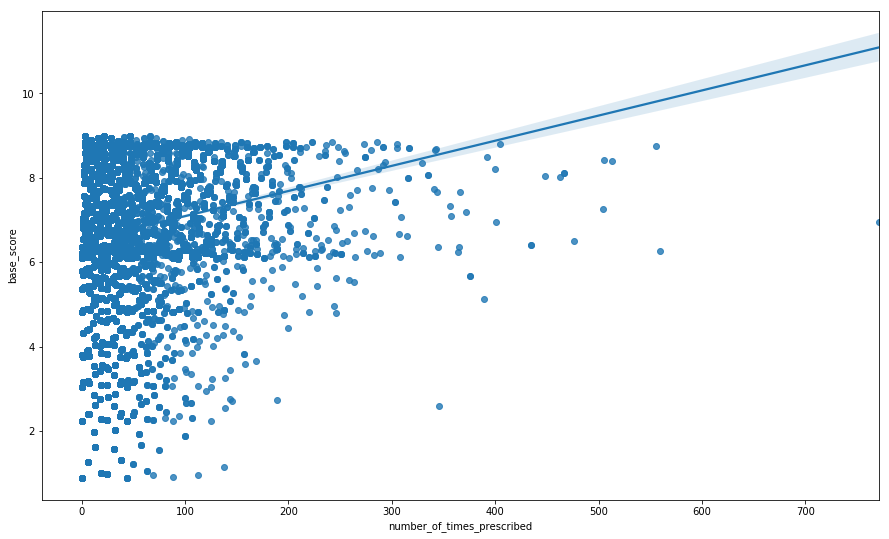

In [362]:
df.head()
sns.regplot(x='number_of_times_prescribed',y='base_score',data=df)

In [363]:
## sentiment analysis from the review
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [364]:
analyser=SentimentIntensityAnalyzer()
df['sent_score']=df['review_by_patient'].map(lambda review:analyser.polarity_scores(review)).map(lambda d:d['compound'])


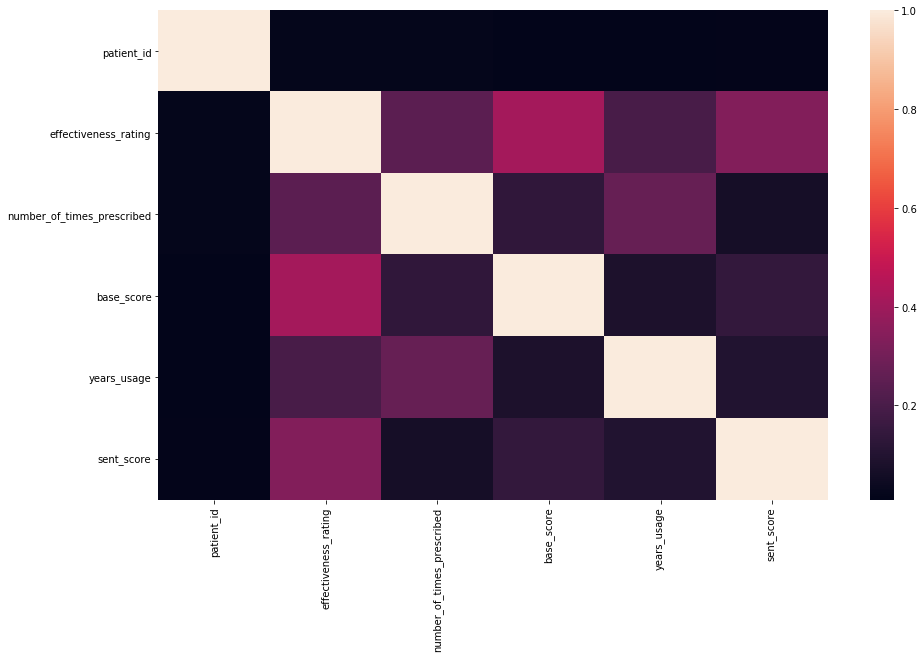

In [365]:
sns.heatmap(df.corr(method='pearson'))

In [366]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


X=add_constant(df._get_numeric_data())
pd.Series([variance_inflation_factor(X.values,i) for i in range (X.shape[1])],index=X.columns)

const                         25.854050
patient_id                     1.000636
effectiveness_rating           1.405508
number_of_times_prescribed     1.127168
base_score                     1.206703
years_usage                    1.103062
sent_score                     1.128667
dtype: float64

In [367]:
from sklearn.preprocessing import LabelEncoder
drug_encoder=LabelEncoder()
disease_encoder=LabelEncoder()

In [368]:
#drug_encoder.fit(df['name_of_drug'])
#disease_encoder.fit(df['use_case_for_drug'])

In [369]:
#df['name_of_drug']=drug_encoder.transform(df['name_of_drug'])
#df['use_case_for_drug']=disease_encoder.transform(df['use_case_for_drug'])

import category_encoders as ce

ce_ord=ce.BinaryEncoder(cols=['name_of_drug','use_case_for_drug'])
dummies=ce_ord.fit_transform(df[['name_of_drug','use_case_for_drug']],df['base_score'])

result=pd.concat([df, dummies], axis=1)

In [370]:
##OLS model
#X=df.copy()
#X[['effectiveness_rating','number_of_times_prescribed','base_score','years_usage']]=X[['effectiveness_rating','number_of_times_prescribed','base_score','years_usage']].apply(lambda x : np.square(x),axis=0)
result.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,years_usage,sent_score,...,use_case_for_drug_1,use_case_for_drug_2,use_case_for_drug_3,use_case_for_drug_4,use_case_for_drug_5,use_case_for_drug_6,use_case_for_drug_7,use_case_for_drug_8,use_case_for_drug_9,use_case_for_drug_10
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,8.022969,8,-0.2960,...,0,1,0,1,0,1,0,0,0,0
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,7.858458,10,0.8603,...,0,0,0,0,1,0,1,0,0,0
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,6.341969,11,0.7645,...,0,0,0,1,1,0,1,1,1,1
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,6.590176,4,0.9403,...,0,1,1,0,0,1,1,1,0,1
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,2015-11-28,43,6.144782,5,-0.4342,...,0,0,0,1,1,0,1,0,1,0


In [273]:
df.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,years_usage,sent_score
0,206461,2072,335,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,8.022969,8,-0.2960
1,95260,923,39,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,7.858458,10,0.8603
2,92703,1212,110,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,6.341969,11,0.7645
3,35696,332,412,"""Suboxone has completely turned my life around...",9,2016-11-27,37,6.590176,4,0.9403
4,155963,436,105,"""2nd day on 5mg started to work with rock hard...",2,2015-11-28,43,6.144782,5,-0.4342


In [274]:
y=X['base_score']
X.drop(columns=['patient_id','review_by_patient','drug_approved_by_UIC','base_score'],inplace=True)

In [257]:
X_1 = sm.add_constant(X)
model = sm.OLS(y,X_1).fit()

In [275]:
X

,name_of_drug,use_case_for_drug,effectiveness_rating,number_of_times_prescribed,years_usage,sent_score
0,2072,335,81,729,64,-0.2960
1,923,39,64,36864,100,0.8603
2,1212,110,25,289,121,0.7645
3,332,412,81,1369,16,0.9403
4,436,105,4,1849,25,-0.4342
5,767,110,64,1,16,-0.9010
6,1095,187,100,2916,9,0.0147
7,118,623,81,1521,9,-0.7520
8,1110,109,100,324,36,-0.7060
9,197,256,64,121,100,0.7243


In [259]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             base_score   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     2644.
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        02:10:21   Log-Likelihood:            -1.3720e+05
No. Observations:               32165   AIC:                         2.744e+05
Df Residuals:                   32161   BIC:                         2.744e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         33.8641      0.221    152.896      0.000      33.430      34.298
use_case_for_drug             -0.0016      0.001     -2.853      0.004      -0.003      -0.000
effectiveness_rating           0.2245      0.003     87.955      0.000       0.220       0.230
number_of_times_prescribed   3.14e-05   1.13e-05      2.791      0.005    9.35e-06    5.35e-05
==============================================================================
Omnibus:                      830.848   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.314
Skew:                           0.025   Prob(JB):                     3.97e-91
Kurtosis:                       2.445   Cond. No.                     2.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

D:\ProgramFiles\anaconda3\envs\nlp_course\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


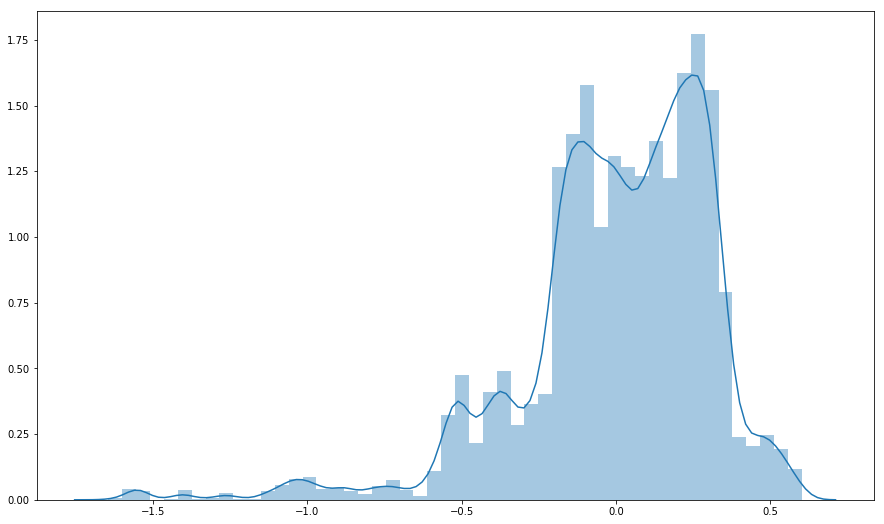

In [251]:
import statsmodels.tsa.api as smt
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot

sns.distplot(model.resid)

D:\ProgramFiles\anaconda3\envs\nlp_course\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


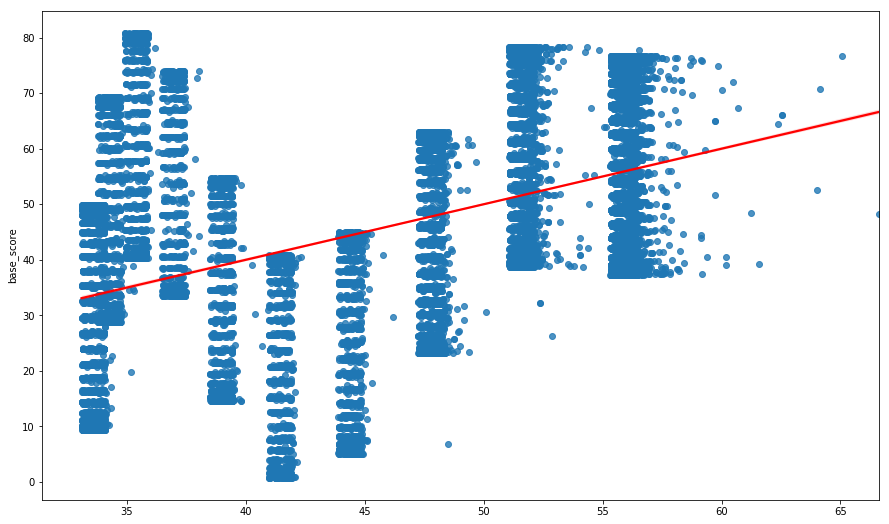

In [260]:
fitted_vals = model.predict()
resids = model.resid

sns.regplot(x=fitted_vals, y=y, lowess=False,line_kws={'color': 'red'})

((array([-4.0902061 , -3.87962964, -3.76463234, ...,  3.76463234,
          3.87962964,  4.0902061 ]),
  array([-2.42981762, -2.39437478, -2.38803215, ...,  2.65645526,
          2.66705006,  2.66705006])),
 (0.9944855815821958, -1.566697937084965e-06, 0.9943649557091463))

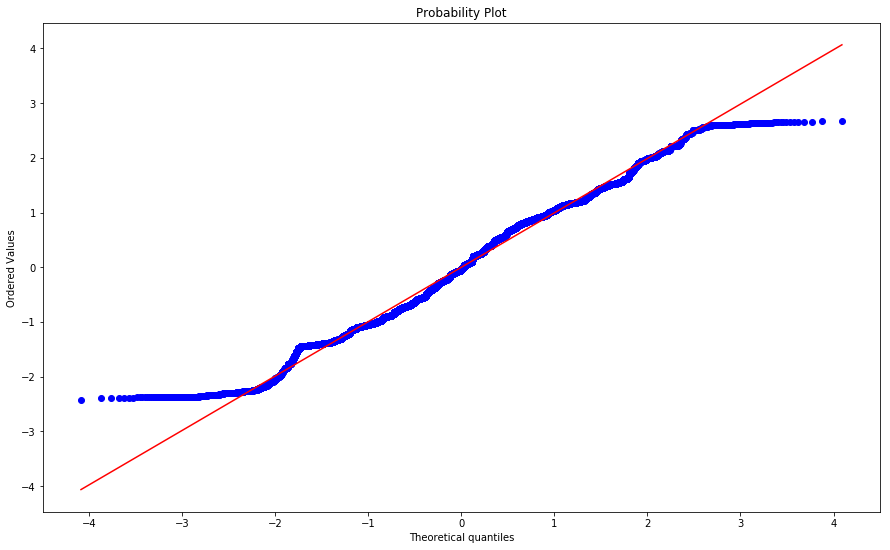

In [261]:
st_residual = model.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)

D:\ProgramFiles\anaconda3\envs\nlp_course\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


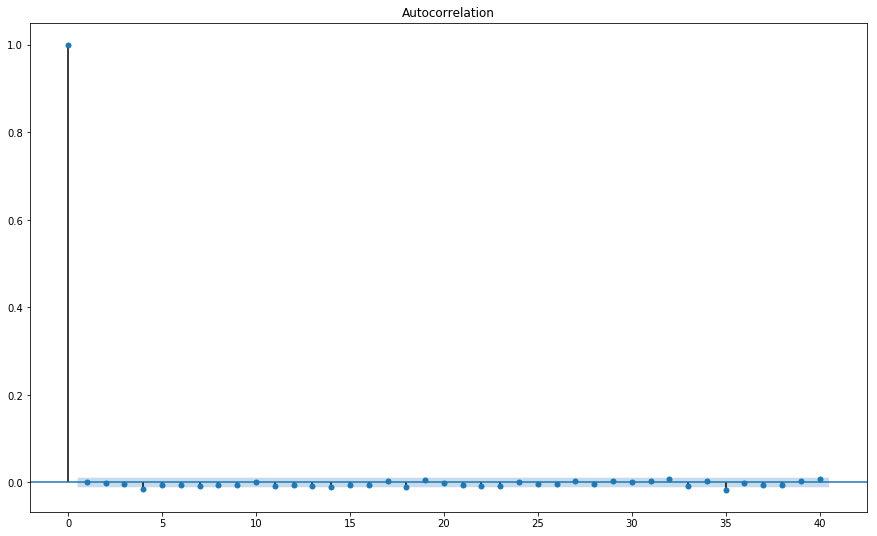

In [262]:
acf=smt.graphics.plot_acf(model.resid, lags=40 , alpha=0.05)
acf.show()

In [276]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [277]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [278]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [266]:
predictions=reg.predict(X_test)

In [279]:
reg.score(X_test,y_test)

0.2024159004717939

In [345]:
df.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [303]:
from sklearn.neural_network import MLPRegressor
reg_cnet=MLPRegressor()

In [304]:

X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['patient_id','review_by_patient','drug_approved_by_UIC','base_score']),df['base_score'],test_size=0.3,random_state=42)

In [305]:
reg_cnet.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [306]:
reg_cnet.score(X_test,y_test)

0.20007503779156408

In [295]:
predictions=reg_cnet.predict(X_test)

X_test['predictions']=predictions

X_test['actual']=y_test

In [296]:
X_test.head()

,name_of_drug,use_case_for_drug,effectiveness_rating,number_of_times_prescribed,years_usage,sent_score,predictions,actual
12551,2047,153,8,30,5,0.9254,8.266634,6.330843
7640,1840,375,9,113,12,0.4588,8.962173,6.235363
24705,1868,256,5,3,3,-0.6249,7.523788,7.390379
27745,1881,99,10,89,6,0.0000,8.705750,6.853083
30741,1509,453,10,20,4,0.1761,8.503803,6.998161


In [378]:
result.columns

Index(['patient_id', 'name_of_drug', 'use_case_for_drug', 'review_by_patient',
       'effectiveness_rating', 'drug_approved_by_UIC',
       'number_of_times_prescribed', 'base_score', 'years_usage', 'sent_score',
       'name_of_drug_0', 'name_of_drug_1', 'name_of_drug_2', 'name_of_drug_3',
       'name_of_drug_4', 'name_of_drug_5', 'name_of_drug_6', 'name_of_drug_7',
       'name_of_drug_8', 'name_of_drug_9', 'name_of_drug_10',
       'name_of_drug_11', 'name_of_drug_12', 'use_case_for_drug_0',
       'use_case_for_drug_1', 'use_case_for_drug_2', 'use_case_for_drug_3',
       'use_case_for_drug_4', 'use_case_for_drug_5', 'use_case_for_drug_6',
       'use_case_for_drug_7', 'use_case_for_drug_8', 'use_case_for_drug_9',
       'use_case_for_drug_10'],
      dtype='object')

In [468]:
X=result.copy()
#X['effectiveness_rating']=X['effectiveness_rating'].map(lambda x:np.square(x))

X_train,X_test,y_train,y_test=train_test_split(X.drop(columns=['name_of_drug','use_case_for_drug','patient_id','review_by_patient','drug_approved_by_UIC','base_score']),X['base_score'],test_size=0.3,random_state=42)

In [469]:
reg_cnet.fit(X_train,y_train)

D:\ProgramFiles\anaconda3\envs\nlp_course\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [470]:
reg_cnet.score(X_test,y_test)

0.6000689394971839

In [463]:
predictions=reg_cnet.predict(X_test)

X_test['predictions']=predictions

X_test['actual']=y_test

In [464]:
X_test.head()

,effectiveness_rating,number_of_times_prescribed,years_usage,sent_score,name_of_drug_0,name_of_drug_1,name_of_drug_2,name_of_drug_3,name_of_drug_4,name_of_drug_5,...,use_case_for_drug_3,use_case_for_drug_4,use_case_for_drug_5,use_case_for_drug_6,use_case_for_drug_7,use_case_for_drug_8,use_case_for_drug_9,use_case_for_drug_10,predictions,actual
12551,64,30,5,0.9254,0,1,0,0,0,0,...,1,0,0,1,1,0,1,0,6.497951,6.330843
7640,81,113,12,0.4588,0,0,1,1,1,0,...,0,1,1,1,1,0,0,0,7.319876,6.235363
24705,25,3,3,-0.6249,0,0,1,1,1,0,...,0,0,0,0,0,0,0,1,6.381708,7.390379
27745,100,89,6,0.0000,0,0,1,1,1,0,...,0,1,1,0,0,1,0,0,7.503869,6.853083
30741,100,20,4,0.1761,0,0,1,0,1,1,...,1,1,0,0,0,1,1,0,7.576696,6.998161
